# Final Project
The purpose of this project is to develop an elemantary understanding of algorytheomic trading. In the furure I hope to build a system that can make serious cash.  One project will not likely be sufficient - I suspect that it will require an effort equivilant to earning a masters degree.  

My expectations is to develop a model that can read ANY stock and successfully predict a few weeks of 3M stock readings.  The models being produced in this project will be based on time series algorytheoms, which allows for a 'one size fits all' approach, which allows for future scanning for grand opportunities.  One major advantage to this approach is that after the project, I can review the project and scan for the best opportunities to either invest, liquidate or continue building the model (ephasis on the last).  Because the sample size for predictions is so small, the hyperparameters must be vauge and hardly used to prevent from overfitting the model.  Most of the interpetation of the model will be based on the RMSE and the visualiztion of the model.  

Because of my desire to keep this project as simple as possible- allowing for forward complexity.  I choosed 3M because I have experiance with the company giving me insights to how to further continue the model.  The stock is also considered a high cap company making it more stable and less likely to be a victim of overfitting.  Finally - but not so importantly, this is my favorite market symbol; 3M = MMM is funny to me!

# Load the data

We are looking for a buy/sell signal.  We hope to have these signals on a daily basis, which gives us a cost effective(data thrity) way of collecting data and seeing long term trends.  No matter the time, we will always look at one year of data and will have 252 to 253 trading days worth of data.  

Using the pandas_datareader you get an amazing tool that allows you to read live market values up to 10000 readings a second!  However, what I must celebrate what this does for this project is it's easy to read!  I have programmed the parameters to capture the entire year based on the date - making my findings time sensitive.  

In [3]:
# Load the data
from datetime import date
import pandas_datareader as pdr
import datetime as dt
from dateutil.relativedelta import relativedelta
symbol = 'mmm'
df = pdr.get_data_yahoo(symbol, date.today() - relativedelta(years=1),  date.today())

As you can see the simple import process allows for us to get an overall view of the daily market trade.  The date of the market instance is indexed making it easy to carry these variables without loosing the time coefficient.  For the aformentioned emphesis on simplicity we are going to focus on the market close price.  

In [2]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-28,200.369995,198.100006,199.320007,198.279999,2139100.0,191.386551
2021-07-29,200.000000,197.940002,200.000000,198.169998,2120200.0,191.280365
2021-07-30,199.240005,197.199997,198.000000,197.940002,1910300.0,191.058365
2021-08-02,200.699997,197.440002,199.070007,197.520004,1332500.0,190.652969
2021-08-03,202.210007,197.399994,198.539993,201.029999,2208200.0,194.040924
...,...,...,...,...,...,...
2022-07-22,134.949997,133.479996,134.649994,134.119995,1759600.0,134.119995
2022-07-25,135.100006,133.779999,134.000000,134.119995,2354100.0,134.119995
2022-07-26,145.699997,138.520004,143.509995,140.750000,12551200.0,140.750000


## Visualize the data 
Becuase we are going to use our eyes to determine the quality of the model, paired with RMSE, we are going to want to start by getting an overview of the stock in addition to buiding a market strategy to the project.  

In [3]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(16,8))
plt.title(symbol)
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.show()

<Figure size 1600x800 with 1 Axes>

It would appear that this may or may not be a great opportunity to buy.  It appears to have experianced a remarkable correction in February.  I hope to create a model that represents the best course of action.  

## Prepping the test data
We are going to predict 38 days of open market into the furture giving us about 15% of the data.  We create a new variable to the dataframe called 'Prediction' where we look at the next 38 days close value and will use it as a response. 

In [38]:
future_days = 38
df['Prediction'] = df[['Close']].shift(-future_days)
import numpy as np
X = np.array(df.drop(['Prediction'],1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]
print(y)

[203.07000732 207.33000183 203.72000122 198.86999512 203.41000366
 204.38000488 205.11000061 203.02999878 202.6000061  201.6499939
 201.86000061 202.61000061 201.71000671 201.58000183 203.24000549
 203.03999329 203.19999695 203.28999329 203.66999817 206.05000305
 203.72999573 203.58999634 202.74000549 203.13000488 202.80999756
 201.36000061 200.61000061 196.91000366 195.13999939 191.6000061
 195.21000671 195.13999939 192.36000061 193.25999451 194.75
 196.5        196.02999878 198.63000488 199.08999634 199.88999939
 196.88999939 199.86000061 198.27000427 201.         199.97999573
 199.6000061  202.83000183 202.58999634 199.36999512 197.55999756
 200.82000732 200.77000427 199.07000732 200.49000549 201.66999817
 200.47000122 198.27999878 198.16999817 197.94000244 197.52000427
 201.02999878 197.52999878 197.80000305 198.13000488 197.42999268
 199.25       201.57000732 201.42999268 200.58000183 202.32000732
 199.55000305 196.50999451 195.36000061 194.16000366 194.67999268
 194.75       194.

Finally, we use the prediction column to create an array of the the future predictor days.  

In [5]:
# Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[1.79500000e+02, 1.77539993e+02, 1.78970001e+02, 1.77630005e+02,
        1.48850000e+06, 1.75929382e+02],
       [1.76830002e+02, 1.73399994e+02, 1.74520004e+02, 1.75520004e+02,
        1.91230000e+06, 1.73839569e+02],
       [1.76830002e+02, 1.74979996e+02, 1.76470001e+02, 1.76229996e+02,
        2.32450000e+06, 1.74542770e+02],
       [1.75860001e+02, 1.69940002e+02, 1.74699997e+02, 1.70039993e+02,
        5.34050000e+06, 1.68412033e+02],
       [1.74649994e+02, 1.70699997e+02, 1.72550003e+02, 1.70729996e+02,
        3.25560000e+06, 1.69095428e+02],
       [1.72779999e+02, 1.69869995e+02, 1.71539993e+02, 1.70259995e+02,
        3.36710000e+06, 1.68629929e+02],
       [1.72910004e+02, 1.69179993e+02, 1.69899994e+02, 1.72589996e+02,
        3.01890000e+06, 1.70937622e+02],
       [1.78279999e+02, 1.74000000e+02, 1.74520004e+02, 1.77199997e+02,
        3.41860000e+06, 1.75503479e+02],
       [1.78339996e+02, 1.76179993e+02, 1.77110001e+02, 1.76550003e+02,
        2.32280000e+06, 

## Splitting the data for performance testing
In addition to the visual analysis, we are going to want to use our conventional Test/train split in order to train the data. We can use our conventional train_test_split dividing our 'live' close date with our prediction close date.   

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Building the models 
Below you will see that I have build five models that can be evaluated and determined if the stock price is predictiable using time series analysis.  Because I have condidtioned the model to train against future values, we are going to want to use regressive models instead of classification models(using such for a continued analysis may be a good practice for building buy/sell signals). The models include a Decision Tree Regressor, a Linear Regression, Random Forest Regression, and a LSTM Model.  The three former models have been used successfully in the class and I hope to apply them successfully to this challenge.  The fourth came up when looking into the subject.  It appears to be the most popular method at the moment and I think this is a great opportunity to learn something new and work with an industry standard.  

## Producing the visualization 
Below we will be visualizing the data with a redundant process - hence we will be using a function that plots our findings.  The only input required is the predictions array.  


In [7]:
import matplotlib.pyplot as plt 
def plot_model(pre):
    valid = df[X.shape[0]:]
    valid['Predictions'] =pre
    plt.figure(figsize = (16,8))
    plt.title('Model')
    plt.xlabel('Days')
    plt.ylabel('Close Price USD ($)')
    plt.plot(df['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Orig', 'Val', 'Pred'])
    plt.show()

## Linear Model

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[161.40944494 158.95259148 161.36237998 167.75724854 163.98930523
 163.95982056 158.91931309 159.64896861 162.22865228 160.2513471
 161.46080976 160.50199397 163.12731477 161.94005637 159.97013057
 157.79623883 165.30926158 160.14539352 161.44712162 161.06293938
 158.81605142 158.34993418 160.22465863 159.26067618 160.80113811
 159.85462255 159.76425414 159.73190933 159.516287   162.72891627
 159.6484079  162.18090621 159.22041973 160.6920643  159.68733513
 161.68284267 160.40840035 161.10335746]


I have to admit, this model acted different than I expected.  I would assume that this model would have a consistant tragectory as the data without any cycles or harmonics.  It appears that the model anticipate the correction, but split the difference between the begining of the prediction cycle and the end of the prediction cycle.   

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


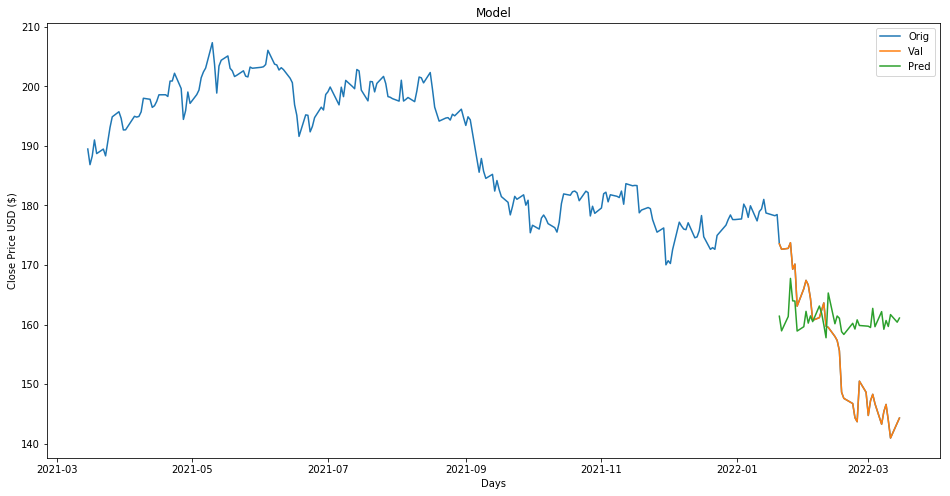

In [9]:
plot_model(lr_prediction)

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test[:38],lr_prediction)

907.4642707988921

In [10]:
lr_prediction

array([161.40944494, 158.95259148, 161.36237998, 167.75724854,
       163.98930523, 163.95982056, 158.91931309, 159.64896861,
       162.22865228, 160.2513471 , 161.46080976, 160.50199397,
       163.12731477, 161.94005637, 159.97013057, 157.79623883,
       165.30926158, 160.14539352, 161.44712162, 161.06293938,
       158.81605142, 158.34993418, 160.22465863, 159.26067618,
       160.80113811, 159.85462255, 159.76425414, 159.73190933,
       159.516287  , 162.72891627, 159.6484079 , 162.18090621,
       159.22041973, 160.6920643 , 159.68733513, 161.68284267,
       160.40840035, 161.10335746])

## Tree Regression

In [17]:
# Create the models: Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(X_train, y_train)
tree_prediction = tree.predict(x_future) 
print(tree_prediction)


[143.69999695 172.6499939  172.80000305 173.75       169.30000305
 170.16000366 169.30000305 166.02000427 167.42999268 166.66000366
 164.38999939 160.72999573 161.16999817 162.41000366 163.63999939
 159.74000549 161.16999817 158.00999451 157.33999634 155.63000488
 148.63999939 147.61999512 146.75       144.38000488 143.69999695
 143.47999573 143.47999573 144.75       147.22000122 148.30000305
 146.72999573 143.27999878 145.3999939  177.1000061  143.92999268
 144.30999756 143.47999573 144.30999756]


As you can see this model mirrors the entire correction period.  You will also notice that the model is a tad more dramatic day to day, representing more agressive buy and sell signals.  You will also notice that our final prediction is an agressive buy. It appears that the model has learned for every correction, there appears to be a bounceback and it is timing that correction for right now.  I do appreciate the model to recognize this cycle, but I am convinced that the underlying cause of the correction is due to current tragic global events and the rising price of oil.  There was not any of this information fed into the model, and better judgement would dictate that this model is to be ignored until a less eventful time.   

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


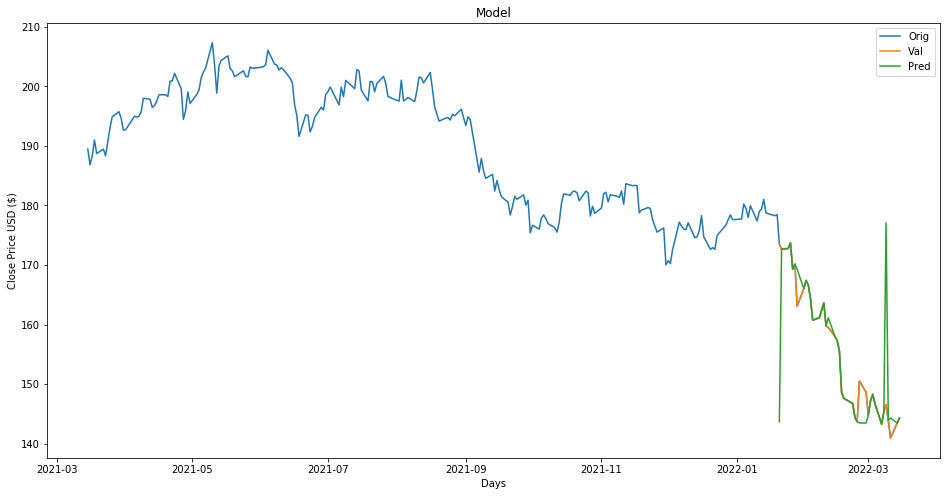

In [18]:
plot_model(tree_prediction)

In [19]:
mean_squared_error(y_test[:38],tree_prediction)

1264.9652947815393

## Random forest regression 
Given our luck with the Tree Regression, intuition tells us to use a random forest (Q: Whats better than a decision tree? A: A bunch of decision trees!).  

In [12]:
# Build a Random Forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=2, random_state=0)
rf = regr.fit(X_train, y_train)
rf_prediction = rf.predict(x_future)
print(rf_prediction)

[178.30865808 177.74113061 164.86579347 164.3507754  164.50096162
 164.50096162 164.50096162 164.50096162 164.50096162 164.29493816
 164.50096162 164.3507754  164.1701345  163.8230143  164.50096162
 164.50096162 164.50096162 160.45836484 164.50096162 164.3507754
 164.50096162 164.50096162 164.3507754  163.55488038 160.3767745
 159.71830706 161.76902181 162.58770219 160.69851214 164.89819717
 162.17268427 163.80563451 159.83376631 166.98621631 159.71107604
 174.98116748 178.15270773 164.42132162]


It appears the the Random Forest has a very similar approach as the linear model.  That is to embrace the correction and split the difference between the early February values and the bottom of the value.  This is likely that the model learned a few corrections and thinks that this current correction is dramatic and money can be made by assuming that the value is overweight.  Again, there are factors on wall street that have given most stocks very agressive selloffs that have not been seen in the past year that the model is not aware of.  

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


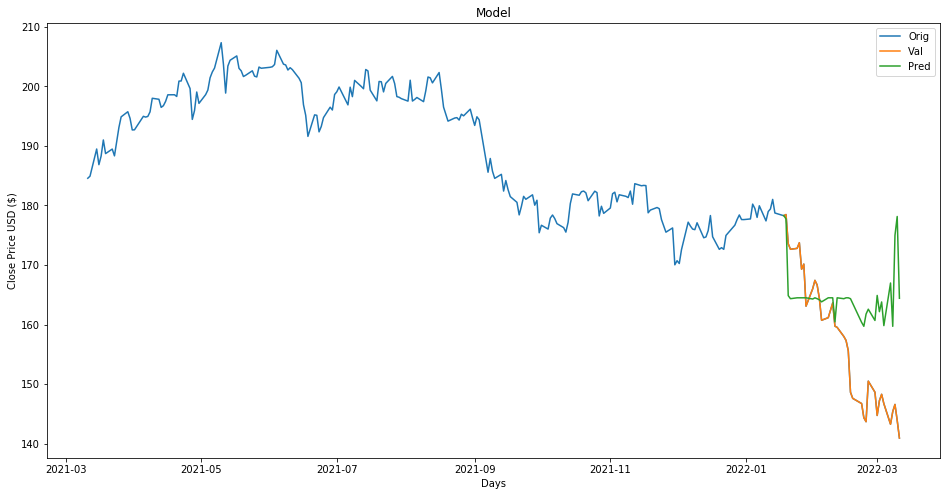

In [13]:
plot_model(rf_prediction)

## SVM Regression

In [14]:
# SVM  
from sklearn.svm import SVR 
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svm = regr.fit(X_train, y_train)
svm_prediction = svm.predict(x_future)
print(svm_prediction)

[176.166398   175.82778417 174.46044227 172.72323147 172.92802462
 179.63840168 174.19600129 174.7412645  173.9786592  174.75042796
 173.35114496 172.86778493 173.10627175 173.7347973  172.93668961
 172.6341251  172.65342191 173.69061272 176.15046199 172.95935733
 172.81484803 172.95920055 172.68680547 173.90199039 173.82006205
 174.68958141 175.0006072  174.05673859 173.80704328 175.98965644
 175.93442145 175.41124056 175.78487159 174.27017044 174.42023206
 175.19108433 176.57810823 175.41414149]


This is my worst model yet! According to this model, the value of 3M stock appears to be business as usual - if only!  It must be that none of the prediction values trigger a correction that indicates a dramatic decrease in the stock price.    

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


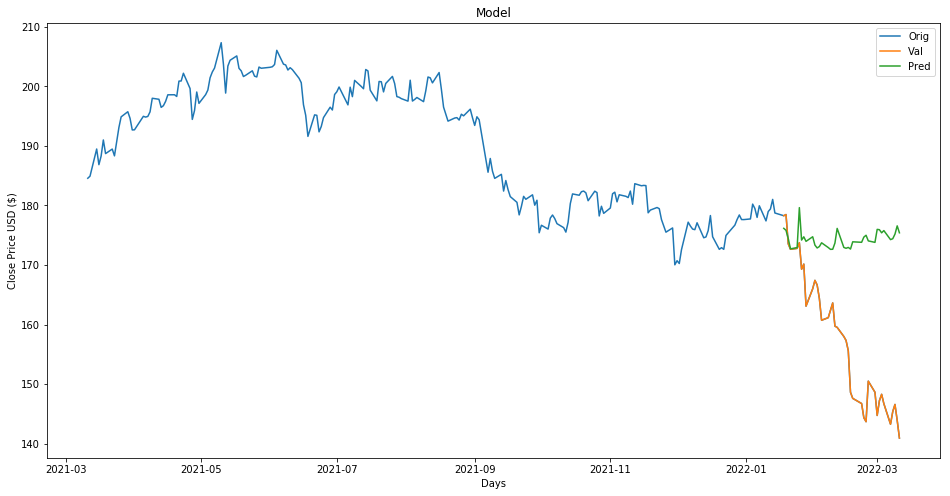

In [15]:
plot_model(svm_prediction)

## LSTM network
From background research I have done with predictive stock market modeling it appears that LSTM is the most common method used and I would not be a fool to explore it.  It manages to hold onto important information and 'forget' about useless information hence Long Term Short Memory.  
### Reprep the data
It appeares that the LSTM Model is much more sensitive to the data structure than the other methods.  After running the same data the model was set on deliving a constant.  It appears that the data has to me scaled and properly wrangled before usage.  Hence we will have to reprepare the data.  

As seen before we are going to look at the market close data and prepare all but 38 values to generate predictions.  

In [24]:
lstmData = df.filter(['Close'])
dataset = lstmData.values
training_data_len = len(dataset)-38

Now as mentioned above, we have to scale the data.  Using the min max scaler we can turn all of our data into decimals (except for the min =0 and max =1).  We will save this data into our scaled_data datset.    

In [25]:
#Scale the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

Below you will see that we need to split the data again into x and y train and test.  Using a 60 day offset we can append them to an empty list using the prior 60 days to predict the next 60 days.  

In [26]:
#Re create Training Set 
lstm_train_data = scaled_data[0:training_data_len,:]
test_data = scaled_data[training_data_len - 60: ,:]

# Create the datasets
lstm_x_train = []
lstm_y_train = []
lstm_x_test = []
lstm_y_test = dataset[training_data_len:, :]

for i in range(60, len(lstm_train_data)):
    lstm_x_train.append(lstm_train_data[i-60:i])
    lstm_y_train.append(lstm_train_data[i,0])
    

for i in range(60, len(test_data)): 
    lstm_x_test.append(test_data[i-60:i, 0])    


Now we have to convert the lists into numpy arrays so the data can be read.  Also, we have to reshape them into a format that the LSTM will understand.  

In [27]:
#Conver to numpy
lstm_x_train, lstm_y_train =   np.array(lstm_x_train), np.array(lstm_y_train)
lstm_x_test = np.array(lstm_x_test)
#Reshape the data
lstm_x_train = np.reshape(lstm_x_train, (lstm_x_train.shape[0], lstm_x_train.shape[1], 1))
lstm_x_test = np.reshape(lstm_x_test, (lstm_x_test.shape[0], lstm_x_test.shape[1], 1))


Finally, we are back to building the models.  We are using 4 layers: The first two training layers then a dense layer and finally an output layer.  

In [28]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM 
from keras.layers.embeddings import Embedding 
from keras.preprocessing import sequence
from keras.layers import Dropout
model = Sequential() 
model.add(LSTM(50, return_sequences = True, input_shape=(lstm_x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

Now that we have created the network, we can run the data through using the MSE method.  We will use 10 epocs because the loss is low, but futher iterations are not necessary.  Finally we have to undo the scaling to our predictions.  

In [29]:
#Compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')
#Train the model 
model.fit(lstm_x_train, lstm_y_train, batch_size = 1, epochs = 10)  
LSTM_predictions = model.predict(lstm_x_test)
LSTM_predictions = scaler.inverse_transform(LSTM_predictions)
LSTM_predictions

Epoch 1/10
156/156 [==============================] - 14s 42ms/step - loss: 0.0094
Epoch 2/10
156/156 [==============================] - 6s 39ms/step - loss: 0.0062
Epoch 3/10
156/156 [==============================] - 6s 38ms/step - loss: 0.0042
Epoch 4/10
156/156 [==============================] - 6s 42ms/step - loss: 0.0033
Epoch 5/10
156/156 [==============================] - 6s 37ms/step - loss: 0.0031
Epoch 6/10
156/156 [==============================] - 9s 55ms/step - loss: 0.0038
Epoch 7/10
156/156 [==============================] - 8s 54ms/step - loss: 0.0031
Epoch 8/10
156/156 [==============================] - 6s 41ms/step - loss: 0.0025
Epoch 9/10
156/156 [==============================] - 7s 42ms/step - loss: 0.0020
Epoch 10/10
156/156 [==============================] - 6s 37ms/step - loss: 0.0020


array([[177.40204],
       [176.04706],
       [174.43237],
       [173.14987],
       [172.52306],
       [171.3071 ],
       [170.3898 ],
       [168.26884],
       [166.8611 ],
       [166.34164],
       [166.13513],
       [165.63788],
       [164.39268],
       [163.24452],
       [162.63828],
       [162.629  ],
       [162.06108],
       [161.37085],
       [160.47194],
       [159.5534 ],
       [158.48798],
       [156.25694],
       [153.88065],
       [151.78954],
       [149.8283 ],
       [148.20988],
       [148.24432],
       [148.6485 ],
       [148.44781],
       [148.46814],
       [148.76251],
       [148.82799],
       [148.16966],
       [147.69981],
       [147.59904],
       [147.20097],
       [146.24231],
       [145.66104]], dtype=float32)

Because of the necessary transformations that were done to the model, we cannot use the same function as above. However we can poach  a massive chunk from above and paste it into our model.  

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


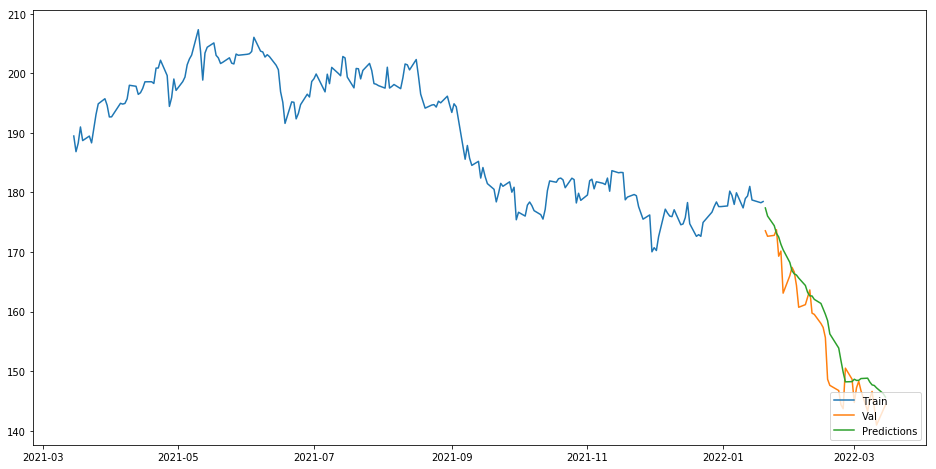

In [30]:
t = lstmData[:training_data_len]
v = lstmData[training_data_len:]
v['Predictions'] = LSTM_predictions

plt.figure(figsize=(16,8))
# Include the title 
# icldue xlabel 
#include y label 
plt.plot(t['Close'])
plt.plot(v[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [41]:
mean_squared_error(X_test[:38],LSTM_predictions)

ValueError: y_true and y_pred have different number of output (6!=1)

In [34]:
y

array([203.07000732, 207.33000183, 203.72000122, 198.86999512,
       203.41000366, 204.38000488, 205.11000061, 203.02999878,
       202.6000061 , 201.6499939 , 201.86000061, 202.61000061,
       201.71000671, 201.58000183, 203.24000549, 203.03999329,
       203.19999695, 203.28999329, 203.66999817, 206.05000305,
       203.72999573, 203.58999634, 202.74000549, 203.13000488,
       202.80999756, 201.36000061, 200.61000061, 196.91000366,
       195.13999939, 191.6000061 , 195.21000671, 195.13999939,
       192.36000061, 193.25999451, 194.75      , 196.5       ,
       196.02999878, 198.63000488, 199.08999634, 199.88999939,
       196.88999939, 199.86000061, 198.27000427, 201.        ,
       199.97999573, 199.6000061 , 202.83000183, 202.58999634,
       199.36999512, 197.55999756, 200.82000732, 200.77000427,
       199.07000732, 200.49000549, 201.66999817, 200.47000122,
       198.27999878, 198.16999817, 197.94000244, 197.52000427,
       201.02999878, 197.52999878, 197.80000305, 198.13

In [35]:
df

,High,Low,Open,Close,Volume,Adj Close,Prediction
Date,,,,,,,
2021-03-15,189.630005,185.710007,186.029999,189.479996,3300000.0,183.391220,203.070007
2021-03-16,188.460007,185.979996,188.000000,186.850006,2264000.0,180.845764,207.330002
2021-03-17,189.990005,187.050003,187.330002,188.300003,2585100.0,182.249146,203.720001
2021-03-18,192.089996,188.600006,188.600006,191.000000,3050500.0,184.862366,198.869995
2021-03-19,191.000000,188.690002,190.600006,188.710007,6678900.0,182.645981,203.410004
...,...,...,...,...,...,...,...
2022-03-09,149.259995,146.490005,147.860001,146.600006,3337300.0,146.600006,NaN
2022-03-10,145.960007,143.330002,145.339996,143.929993,3794000.0,143.929993,NaN
2022-03-11,144.479996,140.830002,143.470001,140.960007,4148700.0,140.960007,NaN


In [40]:
len(y)

216

If you agree this appears to be the best model yet.  It recognizes the bear market we are approaching and finds a similar bottom.  The data is not too "bouncy", which is an indication that there is not a lot of overfit happening.  

# Conclusion
As you can see with some ML methods we can predict the market value of 3M stock among other symobls. It appears the LSTM is the best.  Some of the better models built look promising, but is definately not ready for me to bet my savings or 401K on it(maybe I need to invest in more education).  I am quite satisfied with this proof of concept and am looking forward to reading additional literature on the subject.  

## Continuing the project  
Again, this project was robust, but still a proof of concept.  There are dozens of strategies in the industry, and I simply threw ML models at stock ticking data.  When it comes to applying additional information to the model, I would like to add additional inputs like the cost of oil or the stock of a compeditor like GE. Finally, I would like to study the metrics that best predict sucess (MSE, RMSE, ect) so I can run 500 iterations of the program to look for the best promising model and make some serious cash.  
